In [3]:
import numpy as np
import xarray as xr
from pathlib import Path
from os import PathLike
from kalman_reconstruction.custom_plot import (
    set_custom_rcParams,
    plot_colors,
)
from kalman_reconstruction import pipeline
from kalman_reconstruction.statistics import crosscorr
import matplotlib.pyplot as plt

# from sklearn.linear_model import LinearRegression
from typing import Dict


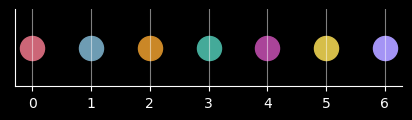

In [4]:
# ## LIGHT THEME
# plt.style.use("seaborn-v0_8-whitegrid")
# dark_color = [0.3, 0.3, 0.3]
# light_color = [0.8, 0.8, 0.8]
# lightness_0 = 0.75
# lightness_1 = 0.5
# cmap = "rocket"
# cmap_r = "rocket_r"

### DARK THEME
plt.style.use("dark_background")
dark_color = [0.7, 0.7, 0.7]
light_color = [0.2, 0.2, 0.2]
lightness_0 = 1.15
lightness_1 = 1.5
cmap = "rocket_r"
cmap_r = "rocket"


colors = set_custom_rcParams()
plt.rcParams["grid.alpha"] = 0.5
plt.rcParams["axes.grid"] = True

plot_colors(colors)

variables_color = dict()
variables_color["NAO_ST"] = colors[0]
variables_color["AMO"] = colors[1]
variables_color["latent1"] = colors[2]
variables_color["latent2"] = colors[3]
variables_color["latent3"] = colors[4]
variables_color["log_likelihod"] = colors[-1]

### Shuffel the NAO data from the members

In [5]:
RepoPath = Path(".").resolve().parent.parent
DataPath = RepoPath / "data" / "earth_system_models" / "CMIP6" 

Shuffel indices

In [113]:
# ACCESS
NAO = xr.open_dataset(DataPath / "ACCESS"/ "NAO_ensemble_norm_ACCESS.nc")
NAO = pipeline.all_dims_as_choords(NAO)
members = NAO.member.values
members_shuffled = np.zeros_like(members)
members_shuffled[0:-1] = members[1:]
assert not np.all(members_shuffled == members)
print("no repetitions found")

NAO_values = NAO.psl.values
NAO_values = NAO_values[members_shuffled, :]
NAO_shuffled = NAO.copy()
NAO_shuffled["psl"] = (("member", "time"), NAO_values)

corr = crosscorr(NAO.psl, NAO_shuffled.psl, dim="time")
assert np.abs(corr.max()) < 0.05
print("correlation is small")

NAO_shuffled.to_netcdf(DataPath / "ACCESS"/ "NAO_ensemble_norm_ACCESS_shuffled.nc")

no repetitions found
correlation is small


In [114]:
# MIROC6
NAO = xr.open_dataset(DataPath / "MIROC6"/ "NAO_ensemble_norm_MIROC.nc")
NAO = pipeline.all_dims_as_choords(NAO)
members = NAO.member.values
members_shuffled = np.zeros_like(members)
members_shuffled[0:-1] = members[1:]
assert not np.all(members_shuffled == members)
print("no repetitions found")

NAO_values = NAO.psl.values
NAO_values = NAO_values[members_shuffled, :]
NAO_shuffled = NAO.copy()
NAO_shuffled["psl"] = (("member", "time"), NAO_values)

corr = crosscorr(NAO.psl, NAO_shuffled.psl, dim="time")
assert np.abs(corr.max()) < 0.05
print("correlation is small")

NAO_shuffled.to_netcdf(DataPath / "MIROC6"/ "NAO_ensemble_norm_MIROC_shuffled.nc")

no repetitions found
correlation is small


### Rolling mean of 10 y 

In [37]:
AMO = xr.open_dataset(DataPath / "MIROC6"/ "AMO_anomalies_MIROC_10yr_roll.nc")
NAO = xr.open_dataset(DataPath / "MIROC6"/ "NAO_ensemble_norm_MIROC.nc")
NAO = NAO.sel(time = AMO.time)
AMO = AMO.sel(time = AMO.time)
NAO.to_netcdf(DataPath / "MIROC6"/ "NAO_ensemble_norm_MIROC_time_as_10yr_roll.nc")

In [36]:
AMO = xr.open_dataset(DataPath / "ACCESS"/ "AMO_anomalies_ACCESS_10yr_roll.nc")
NAO = xr.open_dataset(DataPath / "ACCESS"/ "NAO_ensemble_norm_ACCESS.nc")
NAO = NAO.sel(time = AMO.time)
AMO = AMO.sel(time = AMO.time)
NAO.to_netcdf(DataPath / "ACCESS"/ "NAO_ensemble_norm_ACCESS_time_as_10yr_roll.nc")